# The Lorenz model

In [1]:
import logging

from functools import partial

import numpy as np
import scipy.stats as ss

import elfi
from elfi.examples.lorenz import get_model

logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

np.set_printoptions(threshold=np.nan)

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20180618
np.random.seed(seed)

In [2]:
elfi.set_client('multiprocessing')

In [3]:
m = get_model()

In [4]:
res = m['Lorenz'].generate(1)

In [5]:
# res

In [6]:
# m['d'].generate(1000)

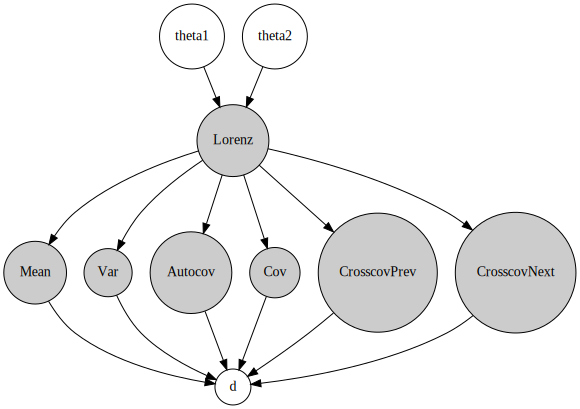

In [7]:
elfi.draw(m['d'])

In [8]:
rej = elfi.Rejection(m['d'], batch_size=1000, seed=seed)

In [9]:
%%time
res = rej.sample(1000)

CPU times: user 164 ms, sys: 8 ms, total: 172 ms
Wall time: 32.9 s


In [10]:
res.summary()

Method: Rejection
Number of samples: 1000
Number of simulations: 100000
Threshold: 0.225
Sample means: theta1: 1.51, theta2: 0.147


CPU times: user 68 ms, sys: 40 ms, total: 108 ms
Wall time: 53.8 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6731c451d0>,
      dtype=object)

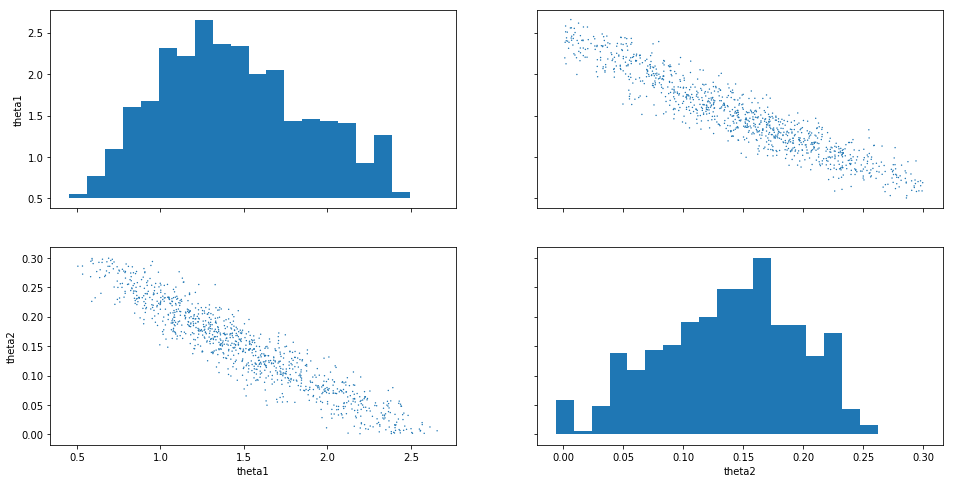

In [11]:
%%time
res.plot_pairs()

# References

- [1] Dutta R, Corander J, Kaski S, Gutmann MU. Likelihood-free inference by ratio estimation. arXiv preprint arXiv:1611.10242. 2016 Nov.